In [1]:
import pandas as pd #data processing
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np # linear algebra
import matplotlib.pyplot as plt #data visualization
import seaborn as sns # data visualization
%matplotlib inline

from datascience import *
import matplotlib
%matplotlib inline
matplotlib.pyplot.show() 
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import math, scipy

In [2]:
# This file is an excel. install pip install xlrd and openpyxl
!pip install xlrd
!pip install openpyxl

In [3]:
# Read in the UN_MigrantStockTotal_2015.xlsx data
# Try reading the excel file constructing a pd.ExcelFile object using the pd.ExcelFile function
xlsx = pd.ExcelFile('data/UN_MigrantStockTotal_2015.xlsx')

In [4]:
# Call all the sheet names so we know what the sheets are called
xlsx.sheet_names

['CONTENTS',
 'Table 1',
 'Table 2',
 'Table 3',
 'Table 4',
 'Table 5',
 'Table 6',
 'ANNEX',
 'NOTES']

In [5]:
# Return "Table 1" as a dataframe using .parse() method on the xlsx pd.ExcelFile object
# Starting with 2nd sheet (index 1) until 7 (leave out contents and notes)
df1 = xlsx.parse(1, header =14)
df1

Sort\norder Major area, region, country or area of destination Notes  \
0            NaN                                                NaN   NaN   
1            1.0                                              WORLD   NaN   
2            2.0                                  Developed regions   (b)   
3            3.0                                 Developing regions   (c)   
4            4.0                          Least developed countries   (d)   
..           ...                                                ...   ...   
261        261.0                                              Samoa   NaN   
262        262.0                                            Tokelau   NaN   
263        263.0                                              Tonga   NaN   
264        264.0                                             Tuvalu   NaN   
265        265.0                          Wallis and Futuna Islands   NaN   

     Country code Type of data (a)  \
0             NaN              NaN   
1           900.0              NaN   
2           901.0              NaN   
3           902.0              NaN   
4           941.0              NaN   
..            ...              ...   
261         882.0                B   
262         772.0                B   
263         776.0                B   
264         798.0                C   
265         876.0                B   

    International migrant stock at mid-year (both sexes) Unnamed: 6  \
0                                                 1990         1995   
1                                            152563212    160801752   
2                                             82378628     92306854   
3                                             70184584     68494898   
4                                             11075966     11711703   
..                                                 ...          ...   
261                                               3357         4694   
262                                                270          266   
263                                               2911         3274   
264                                                318          263   
265                                               1402         1680   

    Unnamed: 7 Unnamed: 8  Unnamed: 9  ...  Unnamed: 13 Unnamed: 14  \
0         2000       2005        2010  ...         2000        2005   
1    172703309  191269100   221714243  ...     87884839    97866674   
2    103375363  117181109   132560325  ...     50536796    57217777   
3     69327946   74087991    89153918  ...     37348043    40648897   
4     10077824    9809634    10018128  ...      5361902     5383009   
..         ...        ...         ...  ...          ...         ...   
261       5998       5746        5122  ...         3101        2940   
262        262        258         429  ...          144         133   
263       3684       4301        5022  ...         1981        2328   
264        217        183         154  ...          121         101   
265       2015       2365        2776  ...         1018        1194   

    Unnamed: 15 Unnamed: 16 International migrant stock at mid-year (female)  \
0          2010        2015                                             1990   
1     114613714   126115435                                         74815702   
2      64081077    67618619                                         42115231   
3      50532637    58496816                                         32700471   
4       5462714     6463217                                          5236216   
..          ...         ...                                              ...   
261        2594        2469                                             1586   
262         206         233                                              120   
263        2727        3127                                             1423   
264          85          78                                              138   
265        1401        1438          

In [6]:
# Put it the data into a dataframe so we can manipulate it 
df1 = pd.DataFrame(df1)
df1

Sort\norder Major area, region, country or area of destination Notes  \
0            NaN                                                NaN   NaN   
1            1.0                                              WORLD   NaN   
2            2.0                                  Developed regions   (b)   
3            3.0                                 Developing regions   (c)   
4            4.0                          Least developed countries   (d)   
..           ...                                                ...   ...   
261        261.0                                              Samoa   NaN   
262        262.0                                            Tokelau   NaN   
263        263.0                                              Tonga   NaN   
264        264.0                                             Tuvalu   NaN   
265        265.0                          Wallis and Futuna Islands   NaN   

     Country code Type of data (a)  \
0             NaN              NaN   
1           900.0              NaN   
2           901.0              NaN   
3           902.0              NaN   
4           941.0              NaN   
..            ...              ...   
261         882.0                B   
262         772.0                B   
263         776.0                B   
264         798.0                C   
265         876.0                B   

    International migrant stock at mid-year (both sexes) Unnamed: 6  \
0                                                 1990         1995   
1                                            152563212    160801752   
2                                             82378628     92306854   
3                                             70184584     68494898   
4                                             11075966     11711703   
..                                                 ...          ...   
261                                               3357         4694   
262                                                270          266   
263                                               2911         3274   
264                                                318          263   
265                                               1402         1680   

    Unnamed: 7 Unnamed: 8  Unnamed: 9  ...  Unnamed: 13 Unnamed: 14  \
0         2000       2005        2010  ...         2000        2005   
1    172703309  191269100   221714243  ...     87884839    97866674   
2    103375363  117181109   132560325  ...     50536796    57217777   
3     69327946   74087991    89153918  ...     37348043    40648897   
4     10077824    9809634    10018128  ...      5361902     5383009   
..         ...        ...         ...  ...          ...         ...   
261       5998       5746        5122  ...         3101        2940   
262        262        258         429  ...          144         133   
263       3684       4301        5022  ...         1981        2328   
264        217        183         154  ...          121         101   
265       2015       2365        2776  ...         1018        1194   

    Unnamed: 15 Unnamed: 16 International migrant stock at mid-year (female)  \
0          2010        2015                                             1990   
1     114613714   126115435                                         74815702   
2      64081077    67618619                                         42115231   
3      50532637    58496816                                         32700471   
4       5462714     6463217                                          5236216   
..          ...         ...                                              ...   
261        2594        2469                                             1586   
262         206         233                                              120   
263        2727        3127                                             1423   
264          85          78                                              138   
265        1401        1438          

In [7]:
# Let's look at the column headers so we can know which ones to rename
display(list(df1.columns.values))

['Sort\norder',
 'Major area, region, country or area of destination',
 'Notes',
 'Country code',
 'Type of data (a)',
 'International migrant stock at mid-year (both sexes)',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10',
 'International migrant stock at mid-year (male)',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'International migrant stock at mid-year (female)',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22']

In [8]:
# I can see there are a ton of duplicated year columns
# First, rename first few column headers to keep organized
df1 = df1.rename(columns={'Sort\norder': 'sort order','Type of data (a)':'Type of data','Unnamed: 6':'Both Sexes','Unnamed: 7':'Both Sexes','Unnamed: 8':'Both Sexes', 'Unnamed: 9':'Both Sexes','Unnamed: 10':'Both Sexes', 'Unnamed: 12':'Male','Unnamed: 13':'Male','Unnamed: 14':'Male','Unnamed: 15':'Male','Unnamed: 16':'Male', 'Unnamed: 18': 'Female', 'Unnamed: 19':'Female','Unnamed: 20':'Female','Unnamed: 21':'Female','Unnamed: 22':'Female'})
df1


sort order Major area, region, country or area of destination Notes  \
0           NaN                                                NaN   NaN   
1           1.0                                              WORLD   NaN   
2           2.0                                  Developed regions   (b)   
3           3.0                                 Developing regions   (c)   
4           4.0                          Least developed countries   (d)   
..          ...                                                ...   ...   
261       261.0                                              Samoa   NaN   
262       262.0                                            Tokelau   NaN   
263       263.0                                              Tonga   NaN   
264       264.0                                             Tuvalu   NaN   
265       265.0                          Wallis and Futuna Islands   NaN   

     Country code Type of data  \
0             NaN          NaN   
1           900.0          NaN   
2           901.0          NaN   
3           902.0          NaN   
4           941.0          NaN   
..            ...          ...   
261         882.0            B   
262         772.0            B   
263         776.0            B   
264         798.0            C   
265         876.0            B   

    International migrant stock at mid-year (both sexes)  Both Sexes  \
0                                                 1990          1995   
1                                            152563212     160801752   
2                                             82378628      92306854   
3                                             70184584      68494898   
4                                             11075966      11711703   
..                                                 ...           ...   
261                                               3357          4694   
262                                                270           266   
263                                               2911          3274   
264                                                318           263   
265                                               1402          1680   

     Both Sexes  Both Sexes  Both Sexes  ...      Male      Male       Male  \
0          2000        2005        2010  ...      2000      2005       2010   
1     172703309   191269100   221714243  ...  87884839  97866674  114613714   
2     103375363   117181109   132560325  ...  50536796  57217777   64081077   
3      69327946    74087991    89153918  ...  37348043  40648897   50532637   
4      10077824     9809634    10018128  ...   5361902   5383009    5462714   
..          ...         ...         ...  ...       ...       ...        ...   
261        5998        5746        5122  ...      3101      2940       2594   
262         262         258         429  ...       144       133        206   
263        3684        4301        5022  ...      1981      2328       2727   
264         217         183         154  ...       121       101         85   
265        2015        2365        2776  ...      1018      1194       1401   

          Male International migrant stock at mid-year (female)    Female  \
0         2015                                             1990      1995   
1    126115435                                         74815702  79064275   
2     67618619                                         42115231  47214055   
3     58496816                                         32700471  31850220   
4      6463217                                          5236216   5573685   
..         ...                                              ...       ...   
261       2469                                             1586      2243   
262        233                                              120       119   
263       3127                                             1423      1556   
264         78                                              138       115   
265       1438        

In [9]:
# Take dataframe where rows are not na in column 'Type of Data' as this very likely won't be necessary
# except we want the years rows
df1.iloc[0,4] ='B'

df1 = df1[df1['Type of data'].notna()]

# Drop unnecessary data such as 'Notes' and 'Type of Data' as this very likely won't be necessary
df1 = df1.drop(['sort order','Notes','Type of data'], axis=1)
# Check - there should be 20 columns now (23-3)
df1

Major area, region, country or area of destination  Country code  \
0                                                  NaN           NaN   
9                                              Burundi         108.0   
10                                             Comoros         174.0   
11                                            Djibouti         262.0   
12                                             Eritrea         232.0   
..                                                 ...           ...   
261                                              Samoa         882.0   
262                                            Tokelau         772.0   
263                                              Tonga         776.0   
264                                             Tuvalu         798.0   
265                          Wallis and Futuna Islands         876.0   

    International migrant stock at mid-year (both sexes)  Both Sexes  \
0                                                 1990          1995   
9                                               333110        254853   
10                                               14079         13939   
11                                              122221         99774   
12                                               11848         12400   
..                                                 ...           ...   
261                                               3357          4694   
262                                                270           266   
263                                               2911          3274   
264                                                318           263   
265                                               1402          1680   

     Both Sexes  Both Sexes  Both Sexes  Both Sexes  \
0          2000        2005        2010        2015   
9        125628      172874      235259      286810   
10        13799       13209       12618       12555   
11       100507       92091      101575      112351   
12        12952       14314       15676       15941   
..          ...         ...         ...         ...   
261        5998        5746        5122        4929   
262         262         258         429         487   
263        3684        4301        5022        5731   
264         217         183         154         141   
265        2015        2365        2776        2849   

    International migrant stock at mid-year (male)    Male   Male   Male  \
0                                             1990    1995   2000   2005   
9                                           163267  124165  61094  84805   
10                                            6717    6614   6511   6286   
11                                           64242   52476  52920  51315   
12                                            6228    6542   6856   7729   
..                                             ...     ...    ...    ...   
261                                           1771    2451   3101   2940   
262                                            150     147    144    133   
263                                           1488    1718   1981   2328   
264                                            180     148    121    101   
265                                            726     859   1018   1194   

       Male    Male International migrant stock at mid-year (female)  Female  \
0      2010    2015                                             1990    1995   
9    115823  141311                                           169843  130688   
10     6060    6071                                             7362    7325   
11    53295   59081                                            57979   47298   
12     8603    8833                                             5620    5858   
..      ...     ...                                              ...     ...   
261    2594    2469                                             1586    2243   
262     206     233                                         

In [10]:
# Check if there is missing data/nulls
missingCount = df1.isnull().sum()
missingCount


Major area, region, country or area of destination      1
Country code                                            1
International migrant stock at mid-year (both sexes)    0
Both Sexes                                              0
Both Sexes                                              0
Both Sexes                                              0
Both Sexes                                              0
Both Sexes                                              0
International migrant stock at mid-year (male)          0
Male                                                    0
Male                                                    0
Male                                                    0
Male                                                    0
Male                                                    0
International migrant stock at mid-year (female)        0
Female                                                  0
Female                                                  0
Female        

In [11]:
# Check which rows have missing data to see why that is. None missing
df1[df1.isna().any(axis=1)]

Major area, region, country or area of destination  Country code  \
0                                                NaN           NaN   

  International migrant stock at mid-year (both sexes)  Both Sexes  \
0                                               1990          1995   

   Both Sexes  Both Sexes  Both Sexes  Both Sexes  \
0        2000        2005        2010        2015   

  International migrant stock at mid-year (male)  Male  Male  Male  Male  \
0                                           1990  1995  2000  2005  2010   

   Male International migrant stock at mid-year (female)  Female  Female  \
0  2015                                             1990    1995    2000   

   Female  Female  Female  
0    2005    2010    2015

In [12]:
# Calculate percentage of missing values

# First, calculate total number of cells in dataframe
totalCells = np.product(df1.shape)

# Then, calculate total number of missing values
totalMissing = missingCount.sum()

# Print Statement
print("Table 1 of the UN_MigrantStockTotal_2015.xlsx data", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

Table 1 of the UN_MigrantStockTotal_2015.xlsx data 0.04 % missing values.


In [13]:
df1

Major area, region, country or area of destination  Country code  \
0                                                  NaN           NaN   
9                                              Burundi         108.0   
10                                             Comoros         174.0   
11                                            Djibouti         262.0   
12                                             Eritrea         232.0   
..                                                 ...           ...   
261                                              Samoa         882.0   
262                                            Tokelau         772.0   
263                                              Tonga         776.0   
264                                             Tuvalu         798.0   
265                          Wallis and Futuna Islands         876.0   

    International migrant stock at mid-year (both sexes)  Both Sexes  \
0                                                 1990          1995   
9                                               333110        254853   
10                                               14079         13939   
11                                              122221         99774   
12                                               11848         12400   
..                                                 ...           ...   
261                                               3357          4694   
262                                                270           266   
263                                               2911          3274   
264                                                318           263   
265                                               1402          1680   

     Both Sexes  Both Sexes  Both Sexes  Both Sexes  \
0          2000        2005        2010        2015   
9        125628      172874      235259      286810   
10        13799       13209       12618       12555   
11       100507       92091      101575      112351   
12        12952       14314       15676       15941   
..          ...         ...         ...         ...   
261        5998        5746        5122        4929   
262         262         258         429         487   
263        3684        4301        5022        5731   
264         217         183         154         141   
265        2015        2365        2776        2849   

    International migrant stock at mid-year (male)    Male   Male   Male  \
0                                             1990    1995   2000   2005   
9                                           163267  124165  61094  84805   
10                                            6717    6614   6511   6286   
11                                           64242   52476  52920  51315   
12                                            6228    6542   6856   7729   
..                                             ...     ...    ...    ...   
261                                           1771    2451   3101   2940   
262                                            150     147    144    133   
263                                           1488    1718   1981   2328   
264                                            180     148    121    101   
265                                            726     859   1018   1194   

       Male    Male International migrant stock at mid-year (female)  Female  \
0      2010    2015                                             1990    1995   
9    115823  141311                                           169843  130688   
10     6060    6071                                             7362    7325   
11    53295   59081                                            57979   47298   
12     8603    8833                                             5620    5858   
..      ...     ...                                              ...     ...   
261    2594    2469                                             1586    2243   
262     206     233                                         

In [14]:
# Have to fill n/a's in "Destination" if we're going to use that row as a header
df1.iloc[0,0] ='Destination'
df1.iloc[0,1] ='Country Code'

df1


Major area, region, country or area of destination  Country code  \
0                                          Destination  Country Code   
9                                              Burundi         108.0   
10                                             Comoros         174.0   
11                                            Djibouti         262.0   
12                                             Eritrea         232.0   
..                                                 ...           ...   
261                                              Samoa         882.0   
262                                            Tokelau         772.0   
263                                              Tonga         776.0   
264                                             Tuvalu         798.0   
265                          Wallis and Futuna Islands         876.0   

    International migrant stock at mid-year (both sexes)  Both Sexes  \
0                                                 1990          1995   
9                                               333110        254853   
10                                               14079         13939   
11                                              122221         99774   
12                                               11848         12400   
..                                                 ...           ...   
261                                               3357          4694   
262                                                270           266   
263                                               2911          3274   
264                                                318           263   
265                                               1402          1680   

     Both Sexes  Both Sexes  Both Sexes  Both Sexes  \
0          2000        2005        2010        2015   
9        125628      172874      235259      286810   
10        13799       13209       12618       12555   
11       100507       92091      101575      112351   
12        12952       14314       15676       15941   
..          ...         ...         ...         ...   
261        5998        5746        5122        4929   
262         262         258         429         487   
263        3684        4301        5022        5731   
264         217         183         154         141   
265        2015        2365        2776        2849   

    International migrant stock at mid-year (male)    Male   Male   Male  \
0                                             1990    1995   2000   2005   
9                                           163267  124165  61094  84805   
10                                            6717    6614   6511   6286   
11                                           64242   52476  52920  51315   
12                                            6228    6542   6856   7729   
..                                             ...     ...    ...    ...   
261                                           1771    2451   3101   2940   
262                                            150     147    144    133   
263                                           1488    1718   1981   2328   
264                                            180     148    121    101   
265                                            726     859   1018   1194   

       Male    Male International migrant stock at mid-year (female)  Female  \
0      2010    2015                                             1990    1995   
9    115823  141311                                           169843  130688   
10     6060    6071                                             7362    7325   
11    53295   59081                                            57979   47298   
12     8603    8833                                             5620    5858   
..      ...     ...                                              ...     ...   
261    2594    2469                                             1586    2243   
262     206     233                                         

In [15]:
# In a tidy data set, each row should represent a single observation. However, here there are rows with summary observations, which means there are many duplicates.
# We have a choice here. We can delete all the rows and columns with summary statistics:
# df1 = df1.drop([1-7,28,38,46,52,70,71,77,85,97,107,126,127,138,152,169,179,180,207,216,231,237,238,241,247,255])

# or we can separate out the dataframe as much as possible so you can still apply some interesting graphs, etc to the data
# I prefer separating out to different data frames
# We will have to separate out the dataframe and then remerge, because then we're not deleting as much data

# set a new index on the dataframe 

df1_index = pd.Series(range(233))
df1 = df1.set_index([df1_index])
df1


Major area, region, country or area of destination  Country code  \
0                                          Destination  Country Code   
1                                              Burundi         108.0   
2                                              Comoros         174.0   
3                                             Djibouti         262.0   
4                                              Eritrea         232.0   
..                                                 ...           ...   
228                                              Samoa         882.0   
229                                            Tokelau         772.0   
230                                              Tonga         776.0   
231                                             Tuvalu         798.0   
232                          Wallis and Futuna Islands         876.0   

    International migrant stock at mid-year (both sexes)  Both Sexes  \
0                                                 1990          1995   
1                                               333110        254853   
2                                                14079         13939   
3                                               122221         99774   
4                                                11848         12400   
..                                                 ...           ...   
228                                               3357          4694   
229                                                270           266   
230                                               2911          3274   
231                                                318           263   
232                                               1402          1680   

     Both Sexes  Both Sexes  Both Sexes  Both Sexes  \
0          2000        2005        2010        2015   
1        125628      172874      235259      286810   
2         13799       13209       12618       12555   
3        100507       92091      101575      112351   
4         12952       14314       15676       15941   
..          ...         ...         ...         ...   
228        5998        5746        5122        4929   
229         262         258         429         487   
230        3684        4301        5022        5731   
231         217         183         154         141   
232        2015        2365        2776        2849   

    International migrant stock at mid-year (male)    Male   Male   Male  \
0                                             1990    1995   2000   2005   
1                                           163267  124165  61094  84805   
2                                             6717    6614   6511   6286   
3                                            64242   52476  52920  51315   
4                                             6228    6542   6856   7729   
..                                             ...     ...    ...    ...   
228                                           1771    2451   3101   2940   
229                                            150     147    144    133   
230                                           1488    1718   1981   2328   
231                                            180     148    121    101   
232                                            726     859   1018   1194   

       Male    Male International migrant stock at mid-year (female)  Female  \
0      2010    2015                                             1990    1995   
1    115823  141311                                           169843  130688   
2      6060    6071                                             7362    7325   
3     53295   59081                                            57979   47298   
4      8603    8833                                             5620    5858   
..      ...     ...                                              ...     ...   
228    2594    2469                                             1586    2243   
229     206     233                                         

In [16]:
# Create a dataframe with just "Both Sexes" and their years. 
# We need to turn both sexes into a column otherwise we can't pivot tables later
df_bothsexes = df1[['Major area, region, country or area of destination','Country code', 'Both Sexes']]
# Check
df_bothsexes

Major area, region, country or area of destination  Country code  \
0                                          Destination  Country Code   
1                                              Burundi         108.0   
2                                              Comoros         174.0   
3                                             Djibouti         262.0   
4                                              Eritrea         232.0   
..                                                 ...           ...   
228                                              Samoa         882.0   
229                                            Tokelau         772.0   
230                                              Tonga         776.0   
231                                             Tuvalu         798.0   
232                          Wallis and Futuna Islands         876.0   

     Both Sexes  Both Sexes  Both Sexes  Both Sexes  Both Sexes  
0          1995        2000        2005        2010        2015  
1        254853      125628      172874      235259      286810  
2         13939       13799       13209       12618       12555  
3         99774      100507       92091      101575      112351  
4         12400       12952       14314       15676       15941  
..          ...         ...         ...         ...         ...  
228        4694        5998        5746        5122        4929  
229         266         262         258         429         487  
230        3274        3684        4301        5022        5731  
231         263         217         183         154         141  
232        1680        2015        2365        2776        2849  

[233 rows x 7 columns]

In [17]:
# Add a new column with a label, 'Sex'
# and fill the values with 'Both sexes' because this is going to be the categorical column for all sexes sortable by sex when we merge into one big dataframe
df_bothsexes['Sex'] = 'Both sexes'
# Check
df_bothsexes


Major area, region, country or area of destination  Country code  \
0                                          Destination  Country Code   
1                                              Burundi         108.0   
2                                              Comoros         174.0   
3                                             Djibouti         262.0   
4                                              Eritrea         232.0   
..                                                 ...           ...   
228                                              Samoa         882.0   
229                                            Tokelau         772.0   
230                                              Tonga         776.0   
231                                             Tuvalu         798.0   
232                          Wallis and Futuna Islands         876.0   

     Both Sexes  Both Sexes  Both Sexes  Both Sexes  Both Sexes         Sex  
0          1995        2000        2005        2010        2015  Both sexes  
1        254853      125628      172874      235259      286810  Both sexes  
2         13939       13799       13209       12618       12555  Both sexes  
3         99774      100507       92091      101575      112351  Both sexes  
4         12400       12952       14314       15676       15941  Both sexes  
..          ...         ...         ...         ...         ...         ...  
228        4694        5998        5746        5122        4929  Both sexes  
229         266         262         258         429         487  Both sexes  
230        3274        3684        4301        5022        5731  Both sexes  
231         263         217         183         154         141  Both sexes  
232        1680        2015        2365        2776        2849  Both sexes  

[233 rows x 8 columns]

In [18]:
# Same with 'Sex' column, need to make location 0,7 the header title 'Sex'
df_bothsexes.iloc[0,7] ='Sex'
# Check
df_bothsexes

Major area, region, country or area of destination  Country code  \
0                                          Destination  Country Code   
1                                              Burundi         108.0   
2                                              Comoros         174.0   
3                                             Djibouti         262.0   
4                                              Eritrea         232.0   
..                                                 ...           ...   
228                                              Samoa         882.0   
229                                            Tokelau         772.0   
230                                              Tonga         776.0   
231                                             Tuvalu         798.0   
232                          Wallis and Futuna Islands         876.0   

     Both Sexes  Both Sexes  Both Sexes  Both Sexes  Both Sexes         Sex  
0          1995        2000        2005        2010        2015         Sex  
1        254853      125628      172874      235259      286810  Both sexes  
2         13939       13799       13209       12618       12555  Both sexes  
3         99774      100507       92091      101575      112351  Both sexes  
4         12400       12952       14314       15676       15941  Both sexes  
..          ...         ...         ...         ...         ...         ...  
228        4694        5998        5746        5122        4929  Both sexes  
229         266         262         258         429         487  Both sexes  
230        3274        3684        4301        5022        5731  Both sexes  
231         263         217         183         154         141  Both sexes  
232        1680        2015        2365        2776        2849  Both sexes  

[233 rows x 8 columns]

In [19]:
# Set row 0 as the new headers, then drop the old headers
df_bothsexes.columns = df_bothsexes.iloc[0]
df_bothsexes = df_bothsexes.reindex(df_bothsexes.index.drop(0))
# Check
df_bothsexes


0                  Destination Country Code    1995    2000    2005    2010  \
1                      Burundi        108.0  254853  125628  172874  235259   
2                      Comoros        174.0   13939   13799   13209   12618   
3                     Djibouti        262.0   99774  100507   92091  101575   
4                      Eritrea        232.0   12400   12952   14314   15676   
5                     Ethiopia        231.0  806904  611384  514242  567720   
..                         ...          ...     ...     ...     ...     ...   
228                      Samoa        882.0    4694    5998    5746    5122   
229                    Tokelau        772.0     266     262     258     429   
230                      Tonga        776.0    3274    3684    4301    5022   
231                     Tuvalu        798.0     263     217     183     154   
232  Wallis and Futuna Islands        876.0    1680    2015    2365    2776   

0       2015         Sex  
1     286810  Both sexes  
2      12555  Both sexes  
3     112351  Both sexes  
4      15941  Both sexes  
5    1072949  Both sexes  
..       ...         ...  
228     4929  Both sexes  
229      487  Both sexes  
230     5731  Both sexes  
231      141  Both sexes  
232     2849  Both sexes  

[232 rows x 8 columns]

In [20]:
# turn dataframe from wide to long using melt
df_bothsexes_l= pd.melt(df_bothsexes,id_vars=['Destination','Country Code','Sex'],
                        value_vars=[1995,2000,2005,2010,2015],
                        var_name='Year',value_name='Total')

# reorganize the columns so it's less confusing

df_bothsexes_l = df_bothsexes_l[['Sex','Destination','Country Code', 'Year','Total']]
df_bothsexes_l

Sex                Destination Country Code  Year   Total
0     Both sexes                    Burundi        108.0  1995  254853
1     Both sexes                    Comoros        174.0  1995   13939
2     Both sexes                   Djibouti        262.0  1995   99774
3     Both sexes                    Eritrea        232.0  1995   12400
4     Both sexes                   Ethiopia        231.0  1995  806904
...          ...                        ...          ...   ...     ...
1155  Both sexes                      Samoa        882.0  2015    4929
1156  Both sexes                    Tokelau        772.0  2015     487
1157  Both sexes                      Tonga        776.0  2015    5731
1158  Both sexes                     Tuvalu        798.0  2015     141
1159  Both sexes  Wallis and Futuna Islands        876.0  2015    2849

[1160 rows x 5 columns]

In [21]:
# do the same for Male
# copy out the Male data
df_male = df1[['Major area, region, country or area of destination','Country code', 'Male']]

In [22]:
# create new column for 'Sex' and fill it with male
df_male['Sex'] = 'Male'

In [23]:
#prepare to make row 0 the new headers!
df_male.iloc[0,7] ='Sex'

# Check
df_male

Major area, region, country or area of destination  Country code    Male  \
0                                          Destination  Country Code    1995   
1                                              Burundi         108.0  124165   
2                                              Comoros         174.0    6614   
3                                             Djibouti         262.0   52476   
4                                              Eritrea         232.0    6542   
..                                                 ...           ...     ...   
228                                              Samoa         882.0    2451   
229                                            Tokelau         772.0     147   
230                                              Tonga         776.0    1718   
231                                             Tuvalu         798.0     148   
232                          Wallis and Futuna Islands         876.0     859   

      Male   Male    Male    Male   Sex  
0     2000   2005    2010    2015   Sex  
1    61094  84805  115823  141311  Male  
2     6511   6286    6060    6071  Male  
3    52920  51315   53295   59081  Male  
4     6856   7729    8603    8833  Male  
..     ...    ...     ...     ...   ...  
228   3101   2940    2594    2469  Male  
229    144    133     206     233  Male  
230   1981   2328    2727    3127  Male  
231    121    101      85      78  Male  
232   1018   1194    1401    1438  Male  

[233 rows x 8 columns]

In [24]:
# Set row 0 as the new headers
df_male.columns = df_male.iloc[0]
# Drop the old headers
df_male = df_male.reindex(df_male.index.drop(0))
# Check
df_male

0                  Destination Country Code    1995    2000    2005    2010  \
1                      Burundi        108.0  124165   61094   84805  115823   
2                      Comoros        174.0    6614    6511    6286    6060   
3                     Djibouti        262.0   52476   52920   51315   53295   
4                      Eritrea        232.0    6542    6856    7729    8603   
5                     Ethiopia        231.0  424117  322219  269725  297534   
..                         ...          ...     ...     ...     ...     ...   
228                      Samoa        882.0    2451    3101    2940    2594   
229                    Tokelau        772.0     147     144     133     206   
230                      Tonga        776.0    1718    1981    2328    2727   
231                     Tuvalu        798.0     148     121     101      85   
232  Wallis and Futuna Islands        876.0     859    1018    1194    1401   

0      2015   Sex  
1    141311  Male  
2      6071  Male  
3     59081  Male  
4      8833  Male  
5    547062  Male  
..      ...   ...  
228    2469  Male  
229     233  Male  
230    3127  Male  
231      78  Male  
232    1438  Male  

[232 rows x 8 columns]

In [25]:
# turn male dataframe from wide to long using melt
df_male_l= pd.melt(df_male,id_vars=['Destination','Country Code','Sex'],
                        value_vars=[1995,2000,2005,2010,2015],
                        var_name='Year',value_name='Total')

# reorganize the columns so it's less confusing

df_male_l = df_male_l[['Sex','Destination','Country Code', 'Year','Total']]
df_male_l

Sex                Destination Country Code  Year   Total
0     Male                    Burundi        108.0  1995  124165
1     Male                    Comoros        174.0  1995    6614
2     Male                   Djibouti        262.0  1995   52476
3     Male                    Eritrea        232.0  1995    6542
4     Male                   Ethiopia        231.0  1995  424117
...    ...                        ...          ...   ...     ...
1155  Male                      Samoa        882.0  2015    2469
1156  Male                    Tokelau        772.0  2015     233
1157  Male                      Tonga        776.0  2015    3127
1158  Male                     Tuvalu        798.0  2015      78
1159  Male  Wallis and Futuna Islands        876.0  2015    1438

[1160 rows x 5 columns]

In [26]:
# do the same for Female
# copy out the Female data into a new dataframe
df_female = df1[['Major area, region, country or area of destination','Country code','Female']]
df_female 

Major area, region, country or area of destination  Country code  Female  \
0                                          Destination  Country Code    1995   
1                                              Burundi         108.0  130688   
2                                              Comoros         174.0    7325   
3                                             Djibouti         262.0   47298   
4                                              Eritrea         232.0    5858   
..                                                 ...           ...     ...   
228                                              Samoa         882.0    2243   
229                                            Tokelau         772.0     119   
230                                              Tonga         776.0    1556   
231                                             Tuvalu         798.0     115   
232                          Wallis and Futuna Islands         876.0     821   

     Female  Female  Female  Female  
0      2000    2005    2010    2015  
1     64534   88069  119436  145499  
2      7288    6923    6558    6484  
3     47587   40776   48280   53270  
4      6096    6585    7073    7108  
..      ...     ...     ...     ...  
228    2897    2806    2528    2460  
229     118     125     223     254  
230    1703    1973    2295    2604  
231      96      82      69      63  
232     997    1171    1375    1411  

[233 rows x 7 columns]

In [27]:
# create new column for 'Sex' and fill it with female
df_female['Sex'] = 'Female'
df_female

Major area, region, country or area of destination  Country code  Female  \
0                                          Destination  Country Code    1995   
1                                              Burundi         108.0  130688   
2                                              Comoros         174.0    7325   
3                                             Djibouti         262.0   47298   
4                                              Eritrea         232.0    5858   
..                                                 ...           ...     ...   
228                                              Samoa         882.0    2243   
229                                            Tokelau         772.0     119   
230                                              Tonga         776.0    1556   
231                                             Tuvalu         798.0     115   
232                          Wallis and Futuna Islands         876.0     821   

     Female  Female  Female  Female     Sex  
0      2000    2005    2010    2015  Female  
1     64534   88069  119436  145499  Female  
2      7288    6923    6558    6484  Female  
3     47587   40776   48280   53270  Female  
4      6096    6585    7073    7108  Female  
..      ...     ...     ...     ...     ...  
228    2897    2806    2528    2460  Female  
229     118     125     223     254  Female  
230    1703    1973    2295    2604  Female  
231      96      82      69      63  Female  
232     997    1171    1375    1411  Female  

[233 rows x 8 columns]

In [28]:
#prepare to make row 0 the new headers!
df_female.iloc[0,7] ='Sex'

# Check
df_female

Major area, region, country or area of destination  Country code  Female  \
0                                          Destination  Country Code    1995   
1                                              Burundi         108.0  130688   
2                                              Comoros         174.0    7325   
3                                             Djibouti         262.0   47298   
4                                              Eritrea         232.0    5858   
..                                                 ...           ...     ...   
228                                              Samoa         882.0    2243   
229                                            Tokelau         772.0     119   
230                                              Tonga         776.0    1556   
231                                             Tuvalu         798.0     115   
232                          Wallis and Futuna Islands         876.0     821   

     Female  Female  Female  Female     Sex  
0      2000    2005    2010    2015     Sex  
1     64534   88069  119436  145499  Female  
2      7288    6923    6558    6484  Female  
3     47587   40776   48280   53270  Female  
4      6096    6585    7073    7108  Female  
..      ...     ...     ...     ...     ...  
228    2897    2806    2528    2460  Female  
229     118     125     223     254  Female  
230    1703    1973    2295    2604  Female  
231      96      82      69      63  Female  
232     997    1171    1375    1411  Female  

[233 rows x 8 columns]

In [29]:
# Set row 0 as the new headers
df_female.columns = df_female.iloc[0]

In [30]:
# Drop the old headers
df_female = df_female.reindex(df_female.index.drop(0))
# Check
df_female

0                  Destination Country Code    1995    2000    2005    2010  \
1                      Burundi        108.0  130688   64534   88069  119436   
2                      Comoros        174.0    7325    7288    6923    6558   
3                     Djibouti        262.0   47298   47587   40776   48280   
4                      Eritrea        232.0    5858    6096    6585    7073   
5                     Ethiopia        231.0  382787  289165  244517  270186   
..                         ...          ...     ...     ...     ...     ...   
228                      Samoa        882.0    2243    2897    2806    2528   
229                    Tokelau        772.0     119     118     125     223   
230                      Tonga        776.0    1556    1703    1973    2295   
231                     Tuvalu        798.0     115      96      82      69   
232  Wallis and Futuna Islands        876.0     821     997    1171    1375   

0      2015     Sex  
1    145499  Female  
2      6484  Female  
3     53270  Female  
4      7108  Female  
5    525887  Female  
..      ...     ...  
228    2460  Female  
229     254  Female  
230    2604  Female  
231      63  Female  
232    1411  Female  

[232 rows x 8 columns]

In [31]:
# turn female dataframe from wide to long using melt
df_female_l= pd.melt(df_female,id_vars=['Destination','Country Code','Sex'],
                        value_vars=[1995,2000,2005,2010,2015],
                        var_name='Year',value_name='Total')

# reorganize the columns so it's less confusing

df_female_l = df_female_l[['Sex','Destination','Country Code', 'Year','Total']]
df_female_l

Sex                Destination Country Code  Year   Total
0     Female                    Burundi        108.0  1995  130688
1     Female                    Comoros        174.0  1995    7325
2     Female                   Djibouti        262.0  1995   47298
3     Female                    Eritrea        232.0  1995    5858
4     Female                   Ethiopia        231.0  1995  382787
...      ...                        ...          ...   ...     ...
1155  Female                      Samoa        882.0  2015    2460
1156  Female                    Tokelau        772.0  2015     254
1157  Female                      Tonga        776.0  2015    2604
1158  Female                     Tuvalu        798.0  2015      63
1159  Female  Wallis and Futuna Islands        876.0  2015    1411

[1160 rows x 5 columns]

In [33]:
# must turn the total column into numeric (if not then the totals column doesn't show up!
df_bothsexes_l['Total'] = df_bothsexes_l['Total'].apply(pd.to_numeric,errors = 'coerce')
# data frame of Male 
df_male_l['Total'] = df_male_l['Total'].apply(pd.to_numeric, errors = 'coerce')
# data frame of Female 
df_female_l['Total'] = df_female_l['Total'].apply(pd.to_numeric, errors = 'coerce')

In [34]:
# pivot gender column of the dataframe of Both sexes 
long_both = pd.pivot_table(df_bothsexes_l, values='Total', index=['Destination','Country Code','Year'], columns=['Sex'])
long_both

Sex                            Both sexes
Destination Country Code Year            
Afghanistan 4.0          1995     71522.0
                         2000     75917.0
                         2005     87300.0
                         2010    102246.0
                         2015    382365.0
...                                   ...
Zimbabwe    716.0        1995    431226.0
                         2000    410041.0
                         2005    392693.0
                         2010    397891.0
                         2015    398866.0

[1149 rows x 1 columns]

In [35]:
# pivot gender column of the dataframe of male

long_male = pd.pivot_table(df_male_l, values='Total', index=['Destination','Country Code','Year'], columns=['Sex'])
long_male

Sex                                Male
Destination Country Code Year          
Afghanistan 4.0          1995   39105.0
                         2000   42848.0
                         2005   49274.0
                         2010   57709.0
                         2015  193445.0
...                                 ...
Zimbabwe    716.0        1995  246012.0
                         2000  233843.0
                         2005  223970.0
                         2010  226967.0
                         2015  227379.0

[1149 rows x 1 columns]

In [36]:
long_female = pd.pivot_table(df_female_l, values='Total', index=['Destination','Country Code','Year'], columns=['Sex'])
long_female

Sex                              Female
Destination Country Code Year          
Afghanistan 4.0          1995   32417.0
                         2000   33069.0
                         2005   38026.0
                         2010   44537.0
                         2015  188920.0
...                                 ...
Zimbabwe    716.0        1995  185214.0
                         2000  176198.0
                         2005  168723.0
                         2010  170924.0
                         2015  171487.0

[1149 rows x 1 columns]

In [37]:
# must ocmbine with axis = 1 or columns = 0 
columns = [long_both,long_male,long_female]

# merge the dataframes by using pd.concat() function

All_sexes = pd.concat(columns, axis = 1)
All_sexes

Sex                            Both sexes      Male    Female
Destination Country Code Year                                
Afghanistan 4.0          1995     71522.0   39105.0   32417.0
                         2000     75917.0   42848.0   33069.0
                         2005     87300.0   49274.0   38026.0
                         2010    102246.0   57709.0   44537.0
                         2015    382365.0  193445.0  188920.0
...                                   ...       ...       ...
Zimbabwe    716.0        1995    431226.0  246012.0  185214.0
                         2000    410041.0  233843.0  176198.0
                         2005    392693.0  223970.0  168723.0
                         2010    397891.0  226967.0  170924.0
                         2015    398866.0  227379.0  171487.0

[1149 rows x 3 columns]

In [38]:
# what are the top 20 destinations of migrants by year
# reshape the dataframe as a wide format with the value of Both sexes column
dest_year = All_sexes['Both sexes'].unstack()
dest_year


Year                                        1995      2000      2005  \
Destination               Country Code                                 
Afghanistan               4.0            71522.0   75917.0   87300.0   
Albania                   8.0            71354.0   76695.0   64739.0   
Algeria                   12.0          262032.0  250110.0  247537.0   
American Samoa            16.0           23098.0   24912.0   24233.0   
Andorra                   20.0           40525.0   42146.0   50298.0   
...                                          ...       ...       ...   
Wallis and Futuna Islands 876.0           1680.0    2015.0    2365.0   
Western Sahara            732.0           2989.0    3289.0    3891.0   
Yemen                     887.0         136515.0  143495.0  171073.0   
Zambia                    894.0         244338.0  321167.0  252749.0   
Zimbabwe                  716.0         431226.0  410041.0  392693.0   

Year                                        2010      2015  
Destination               Country Code                      
Afghanistan               4.0           102246.0  382365.0  
Albania                   8.0            52784.0   57616.0  
Algeria                   12.0          244964.0  242391.0  
American Samoa            16.0           23555.0   23216.0  
Andorra                   20.0           52053.0   42082.0  
...                                          ...       ...  
Wallis and Futuna Islands 876.0           2776.0    2849.0  
Western Sahara            732.0           4493.0    5179.0  
Yemen                     887.0         285837.0  344131.0  
Zambia                    894.0         149637.0  127915.0  
Zimbabwe                  716.0         397891.0  398866.0  

[232 rows x 5 columns]

In [45]:
# list the top 15 destination countries in 1995
dest_1995 = dest_year[1995] # create a dataframe with only the 1995 column (remember the other columns are indexed)
dest_1995_largest = dest_1995.nlargest(15)

Destination                                           Country Code
United States of America                              840.0           28451053.0
Russian Federation                                    643.0           11928927.0
Germany                                               276.0            7464406.0
India                                                 356.0            6952238.0
Ukraine                                               804.0            6172338.0
France                                                250.0            6087993.0
Saudi Arabia                                          682.0            5122702.0
Canada                                                124.0            4864778.0
United Kingdom of Great Britain and Northern Ireland  826.0            4155293.0
Australia                                             36.0             4153330.0
Pakistan                                              586.0            3669308.0
Kazakhstan                                

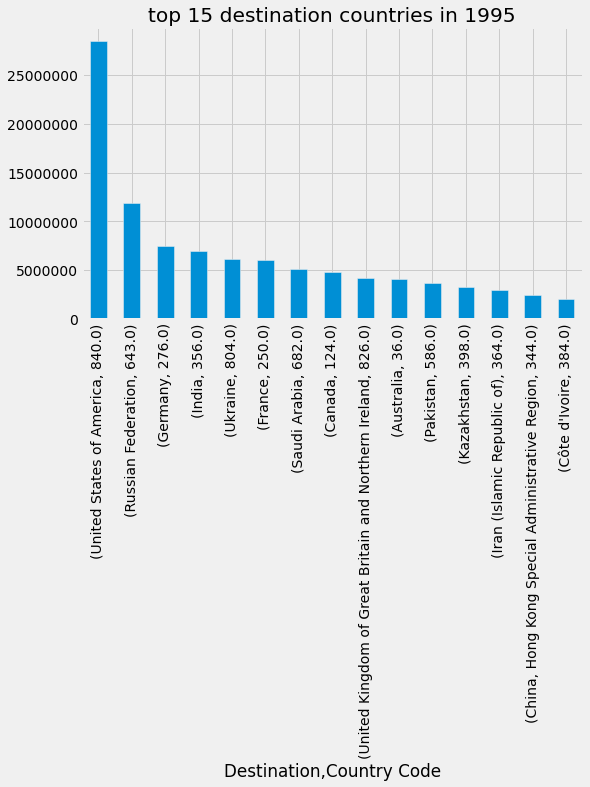

In [92]:
dest_1995_largest.plot(kind='bar', figsize=(8,5), 
              title='top 15 destination countries in 1995')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')

# save the figure
plt.savefig('plot1.png', dpi=300, bbox_inches='tight')
plt.show()



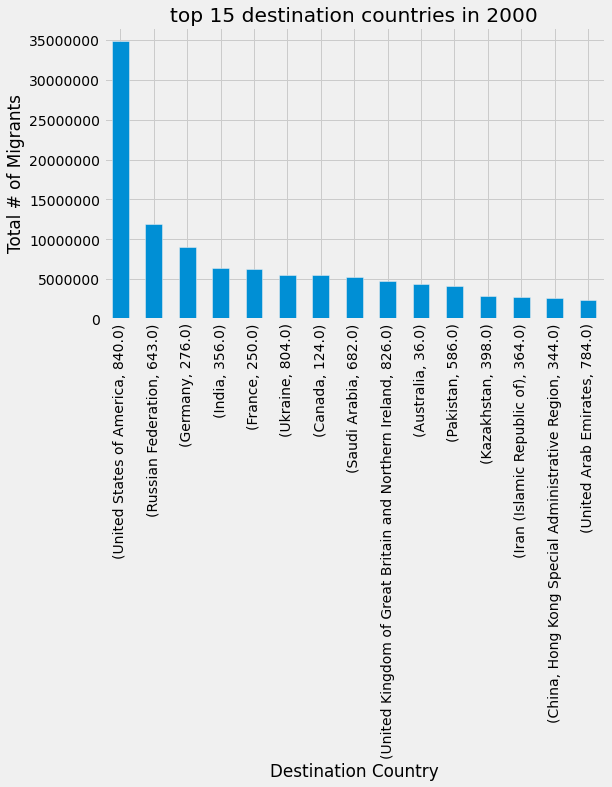

In [73]:
# list the top 15 destination countries in 2000
dest_2000 = dest_year[2000] # create a dataframe with only the 2000 column (remember the other columns are indexed)
dest_2000_largest = dest_2000.nlargest(15)


dest_2000_largest.plot(kind='bar', figsize=(8,5), 
              title='top 15 destination countries in 2000')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.xlabel("Destination Country")
plt.ylabel("Total # of Migrants")
plt.ticklabel_format(style='plain', axis='y')


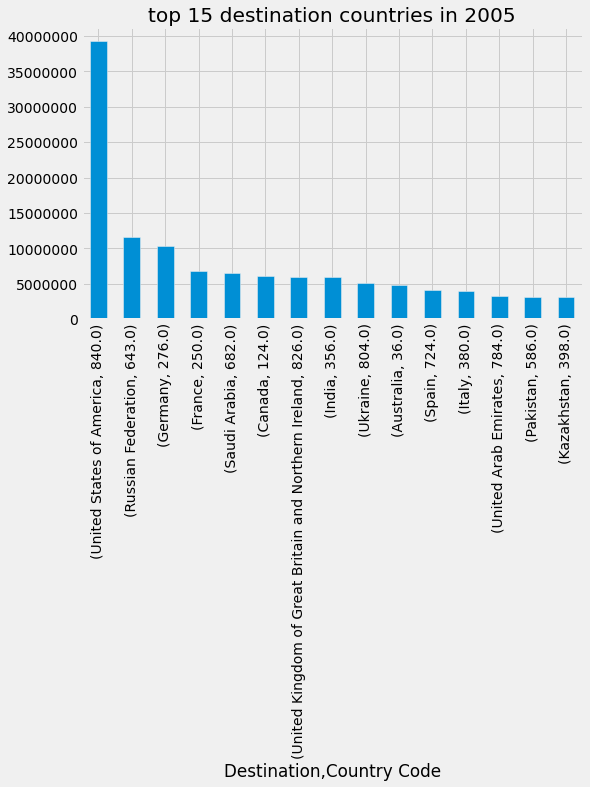

In [52]:
# list the top 15 destination countries in 2005
dest_2005 = dest_year[2005] # create a dataframe with only the 2005 column (remember the other columns are indexed)
dest_2005_largest = dest_2005.nlargest(15)


dest_2005_largest.plot(kind='bar', figsize=(8,5), 
              title='top 15 destination countries in 2005')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.xlabel("Destination Country")
plt.ylabel("Total # of Migrants")
plt.ticklabel_format(style='plain', axis='y')

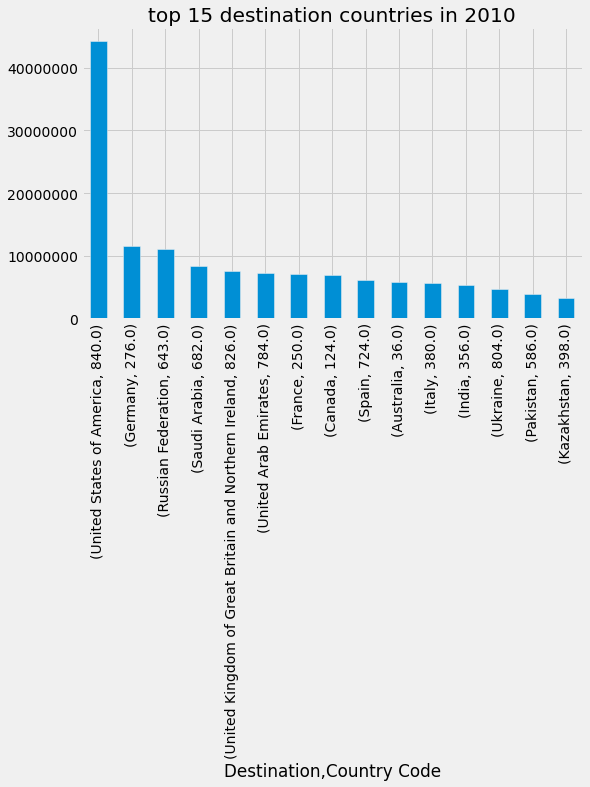

In [53]:
# list the top 15 destination countries in 2010
dest_2010 = dest_year[2010] # create a dataframe with only the 2010 column (remember the other columns are indexed)
dest_2010_largest = dest_2010.nlargest(15)


dest_2010_largest.plot(kind='bar', figsize=(8,5), 
              title='top 15 destination countries in 2010')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.xlabel("Destination Country")
plt.ylabel("Total # of Migrants")
plt.ticklabel_format(style='plain', axis='y')

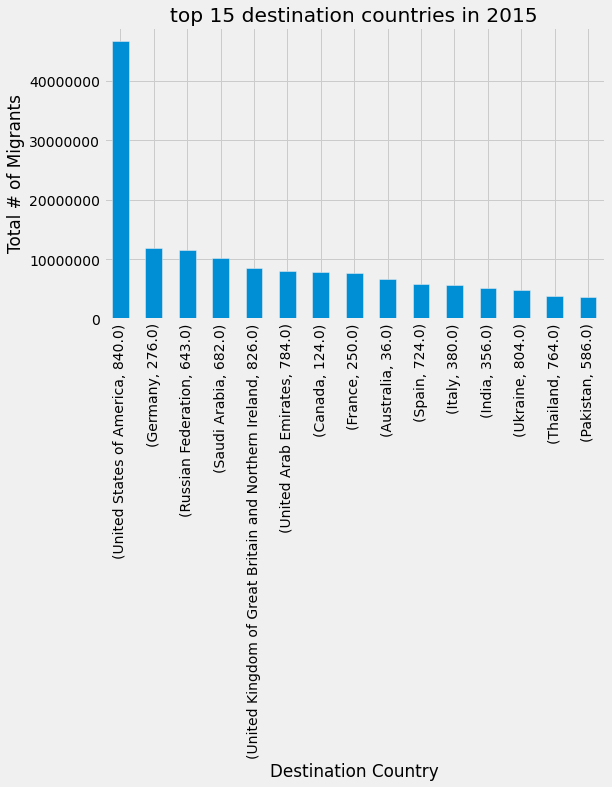

In [67]:
# list the top 15 destination countries in 2015
dest_2015 = dest_year[2015] # create a dataframe with only the 2015 column (remember the other columns are indexed)
dest_2015_largest = dest_2015.nlargest(15)


dest_2015_largest.plot(kind='bar', figsize=(8,5), 
              title='top 15 destination countries in 2015')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.xlabel("Destination Country")
plt.ylabel("Total # of Migrants")
plt.ticklabel_format(style='plain', axis='y')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f68c386d100>,
 'caps': [<matplotlib.lines.Line2D at 0x7f68c386d6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6878151df0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f68c386dc40>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f68c386df10>,
 'means': []}

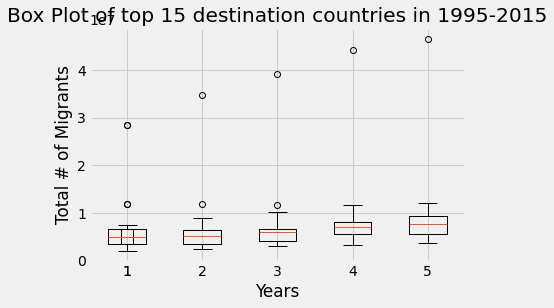

In [93]:
# Create multiple boxplots on one matplotlib graph with each box plot representing the top 15 countries in 5 years
# as you can see from the box plot there are consistently couple of huge outliers (US and Russia), but then in the past 
# 10 years it really does become mostly the US as the primary destination country

fig, ax = plt.subplots()

ax.boxplot(dest_1995_largest)

#playing around with viz parameters
ax.set_title('Box Plot of top 15 destination countries in 1995-2015')
ax.set_xlabel('Years')
ax.set_ylabel('Total # of Migrants')


ax.yaxis.grid(True)
plt.boxplot ([dest_1995_largest, dest_2000_largest, dest_2005_largest, dest_2010_largest, dest_2015_largest])


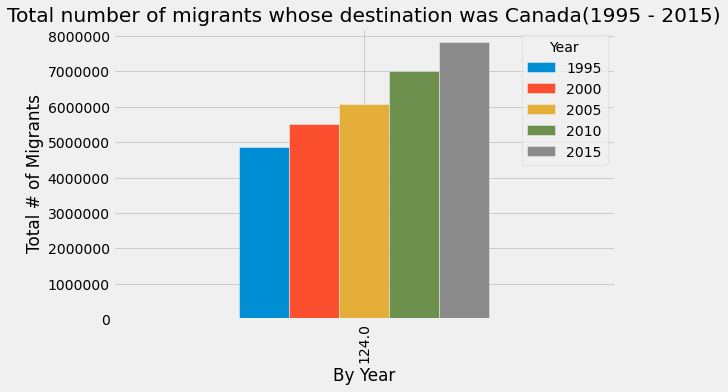

In [101]:
#The total number of migrants to Canada by the year (both sexes)
df_canada = dest_year.loc['Canada']


df_canada.plot(kind='bar', figsize=(8,5), 
              title='Total number of migrants whose destination was Canada(1995 - 2015)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.xlabel("By Year")
plt.ylabel("Total # of Migrants")
plt.ticklabel_format(style='plain', axis='y')

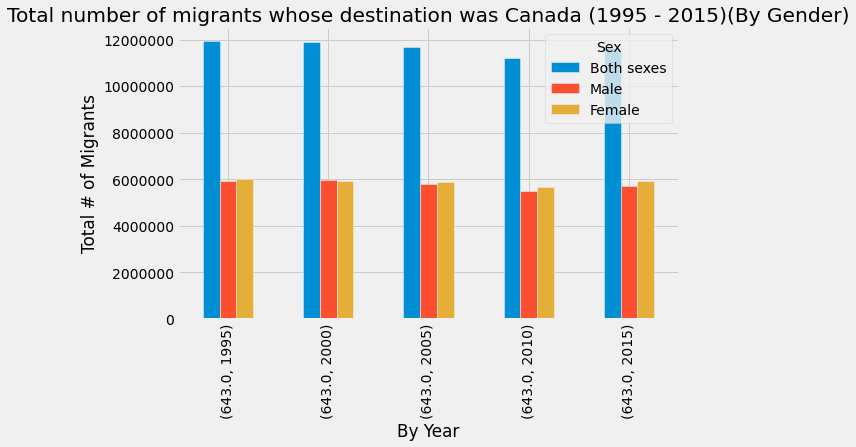

In [100]:
#The total number of migrants to Russian Federation by the year (M, F, Both)
df_canada_both = All_sexes.loc['Canada']


df_russia.plot(kind='bar', figsize=(8,5), 
              title='Total number of migrants whose destination was Canada (1995 - 2015)(By Gender)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.xlabel("By Year")
plt.ylabel("Total # of Migrants")
plt.ticklabel_format(style='plain', axis='y')

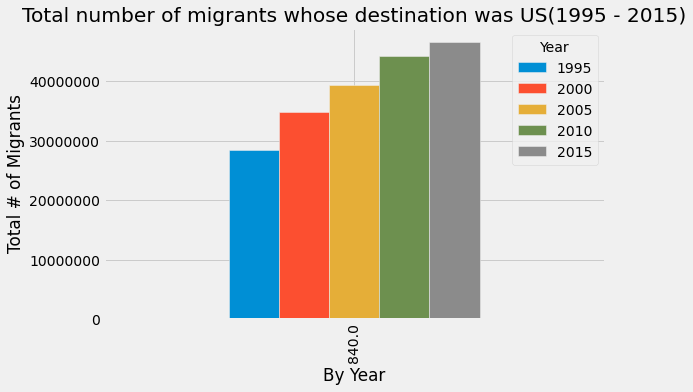

In [99]:
#The total number of migrants to US by the year (both sexes)
df_us_both = dest_year.loc['United States of America']

df_us_both.plot(kind='bar', figsize=(8,5), 
              title='Total number of migrants whose destination was US(1995 - 2015)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.xlabel("By Year")
plt.ylabel("Total # of Migrants")
plt.ticklabel_format(style='plain', axis='y')

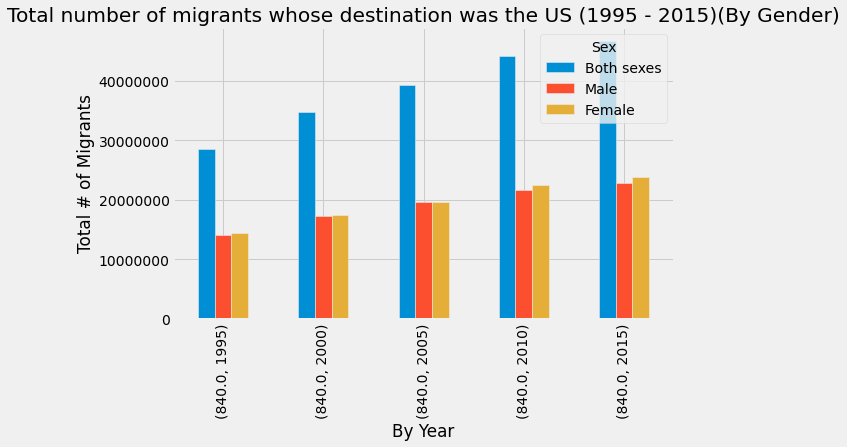

In [98]:
#The total number of migrants to US by the year (M, F, Both)
df_us = All_sexes.loc['United States of America']


df_us.plot(kind='bar', figsize=(8,5), 
              title='Total number of migrants whose destination was the US (1995 - 2015)(By Gender)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.xlabel("By Year")
plt.ylabel("Total # of Migrants")
plt.ticklabel_format(style='plain', axis='y')



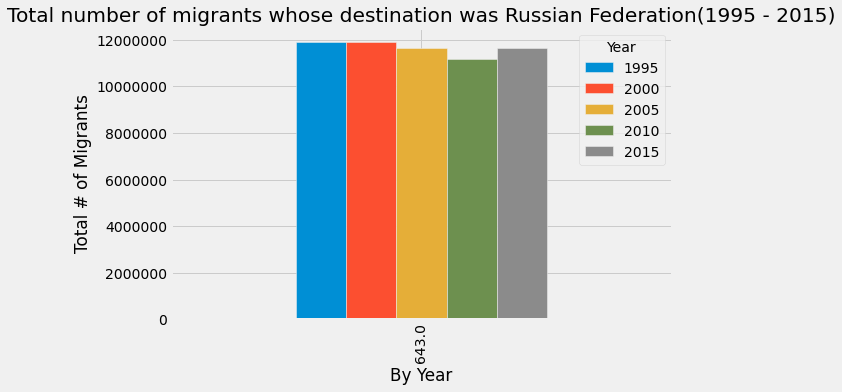

In [97]:
#The total number of migrants to the Russian Federation by the year (both sexes)
df_russia_both = dest_year.loc['Russian Federation']

df_russia_both.plot(kind='bar', figsize=(8,5), 
              title='Total number of migrants whose destination was Russian Federation(1995 - 2015)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.xlabel("By Year")
plt.ylabel("Total # of Migrants")
plt.ticklabel_format(style='plain', axis='y')

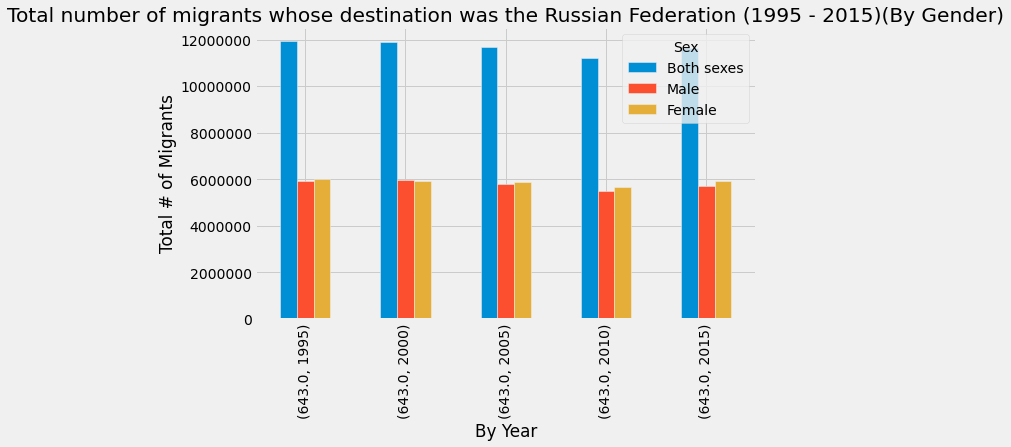

In [96]:
#The total number of migrants to Russian Federation by the year (M, F, Both)
df_russia = All_sexes.loc['Russian Federation']


df_russia.plot(kind='bar', figsize=(8,5), 
              title='Total number of migrants whose destination was the Russian Federation (1995 - 2015)(By Gender)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.xlabel("By Year")
plt.ylabel("Total # of Migrants")
plt.ticklabel_format(style='plain', axis='y')

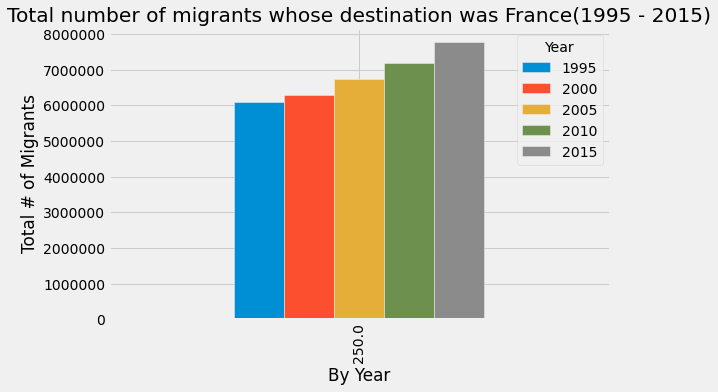

In [94]:
#The total number of migrants to France by the year (both sexes)
df_france_both = dest_year.loc['France']

df_france_both.plot(kind='bar', figsize=(8,5), 
              title='Total number of migrants whose destination was France(1995 - 2015)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.xlabel("By Year")
plt.ylabel("Total # of Migrants")
plt.ticklabel_format(style='plain', axis='y')